<a href="https://www.kaggle.com/code/bibiamnabibi/survival-prediction-using-knn-decision-tree?scriptVersionId=124501322" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/train.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [3]:
Data = pd.read_excel("/kaggle/input/titanic-dataset/train.xlsx")

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing Values:**

There are 177 missing values in Age column, 687 missing values in Cabin column and 2 missing values in Embraked column.

We can drop Cabin column since 77% of values are missing, for Age column we can take average, and for embarked column we can take mode and fill values.

In [7]:
embarked_mode= Data['Embarked'].mode()
embarked_mode

0    S
dtype: object

In [8]:
Data['Embarked'].fillna(value='S', inplace= True)

In [9]:
Data['Embarked'].isna().sum()

0

In [10]:
# calculate average age where sex is female
female_mean_age= Data.loc[Data['Sex'] == 'female', 'Age'].mean()

# round of age to 1 decimal place
female_mean_age.round(decimals=1)

#filling missing value in age column where sex is female
Data.loc[(Data['Sex'] == 'female') & (Data['Age'].isnull()), 'Age'] = female_mean_age

In [11]:
# calculate average age where sex is female
male_mean_age= Data.loc[Data['Sex']=='male', 'Age'].mean()

# round of age to 1 decimal place
male_mean_age.round(decimals=1)

#filling missing value in age column where sex is male
Data.loc[(Data['Sex'] == 'male') & (Data['Age'].isnull()), 'Age'] = male_mean_age

In [12]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
# dropping  Cabin column
Data.drop('Cabin', axis=1, inplace= True)

In [14]:
Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Changing data types and converting categorical data** into numeric data

In [15]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [16]:
# creating one-hot encoding for 'Sex' column
sex_onehot = pd.get_dummies(Data['Sex'])

# creating one-hot encoding for 'Embarked' column
embarked_onehot = pd.get_dummies(Data['Embarked'])

# adding the one-hot encoded columns to the original Data
Data = pd.concat([Data, sex_onehot, embarked_onehot], axis=1)

# droping the original 'Sex' and 'Embarked' columns
Data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [17]:
Data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [18]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
female           uint8
male             uint8
C                uint8
Q                uint8
S                uint8
dtype: object

In [19]:
Data.to_excel('Processed_train_data.xlsx', index= False)

Data is preprocessed, now we can use it to analyze relations between variables and choose important features.

In [20]:
Data1= pd.read_excel('/kaggle/working/Processed_train_data.xlsx')

In [21]:
Data1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [22]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   female       891 non-null    int64  
 10  male         891 non-null    int64  
 11  C            891 non-null    int64  
 12  Q            891 non-null    int64  
 13  S            891 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 97.6+ KB


In [23]:
Data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [24]:
#dropping Name, PassegerId and Ticket column since we dont need it in training 
data= Data1.drop(['Name','Ticket','PassengerId'], axis=1)

In [25]:
data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


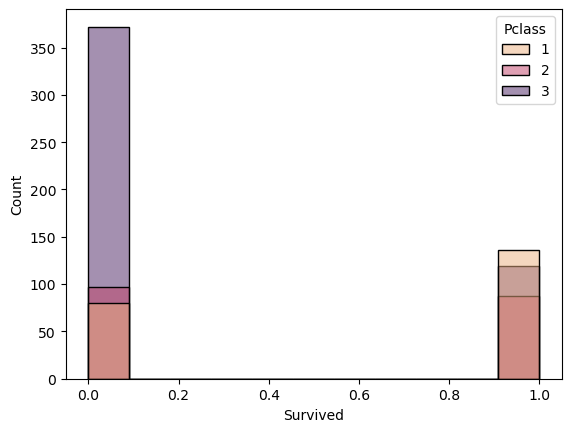

In [26]:
sns.histplot(x=Data1['Survived'], hue= Data1['Pclass'], palette='flare')
plt.show()

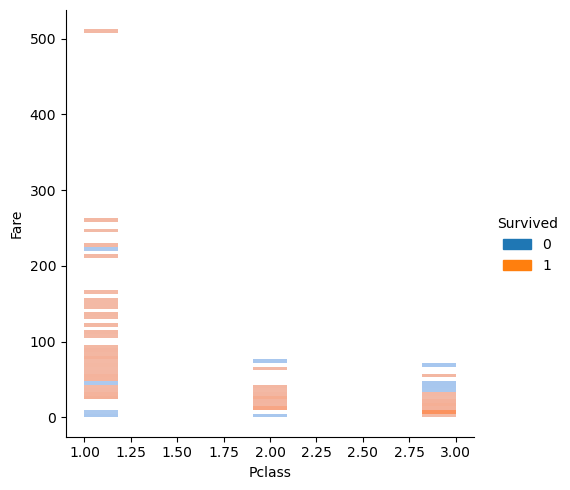

In [27]:
sns.displot(data= Data1, y= 'Fare', x= 'Pclass', hue= 'Survived')
plt.show()

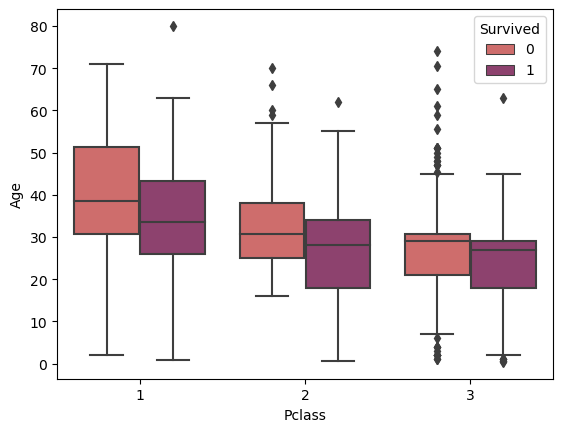

In [28]:
sns.boxplot(data=data, x='Pclass', y='Age', hue='Survived',palette='flare' )
plt.show()

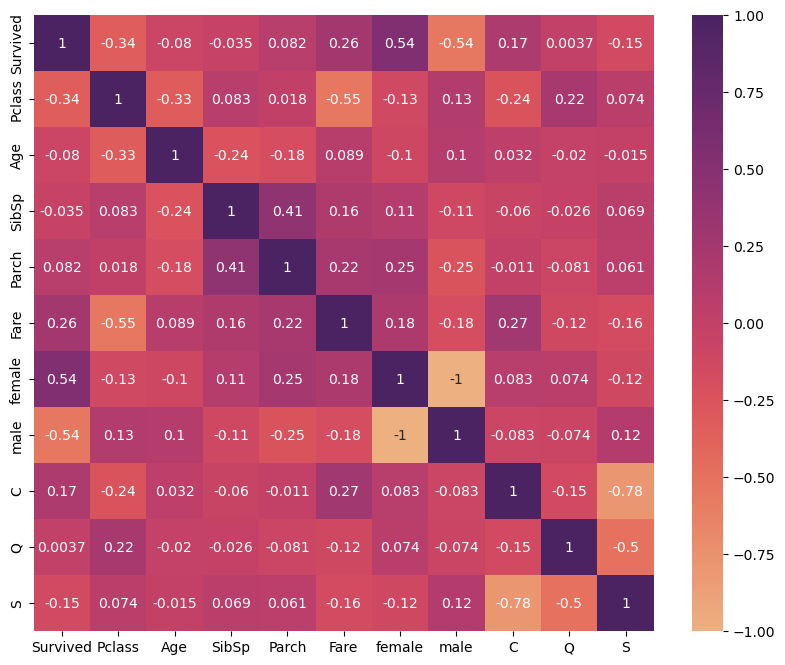

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(), annot= True, cmap='flare')
plt.show()

**Data Splitting**

In [30]:
#spliting data into data and labels
Data = np.array(data.iloc[:,1:])

Labels = np.array(data['Survived'])

In [31]:
print(Data.shape)
print(Labels.shape)

(891, 10)
(891,)


In [32]:
test_size =20

#splitting data into train and test data
x_train, x_test, y_train, y_test = train_test_split(Data,Labels, test_size = test_size, random_state = 10)

# **Using KNN**

In [33]:
#using cross validation score to calculateoptimal value of K

klist = []
K_scores = []
for k in range(3,30):
   klist.append(k)
   knn = KNeighborsClassifier(n_neighbors = k)
   scores = cross_val_score(knn,x_train,y_train,cv=10, scoring = 'accuracy')
   K_scores.append(scores.mean())

In [34]:
print(K_scores)

[0.7314263322884013, 0.7256922675026123, 0.7153735632183909, 0.7119122257053291, 0.7314263322884014, 0.7004440961337514, 0.7165360501567398, 0.7119122257053292, 0.7061650992685475, 0.7153082549634273, 0.7153213166144201, 0.7210292580982236, 0.7175940438871473, 0.7141457680250782, 0.7153082549634273, 0.7095350052246604, 0.7003918495297805, 0.7003265412748172, 0.6957810867293626, 0.6992163009404389, 0.7038401253918496, 0.7049764890282131, 0.7038401253918496, 0.7095480668756531, 0.7049503657262278, 0.7095219435736677, 0.7026384535005225]


Text(0, 0.5, 'Mean Error')

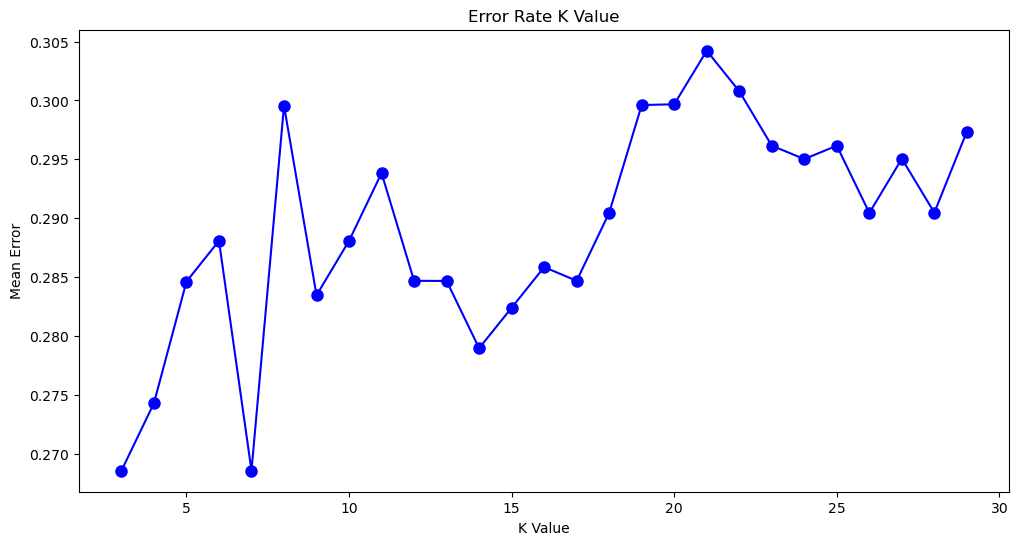

In [35]:
# calculating MSE
MSE=[1-x for x in K_scores]

#plotting graph to visualize error rate and k values
plt.figure(figsize=(12, 6))
plt.plot(range(3,30), MSE, color='blue', linestyle="solid", marker='o',markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [36]:
#value of k for which mse is minimum is optimal
Optimal_K = klist[MSE.index(min(MSE))]

print("The optimal value of K (neighbors) is ",Optimal_K)

The optimal value of K (neighbors) is  7


In [37]:
KNN = KNeighborsClassifier(n_neighbors = 7)

KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
#predicting test data
y_predict= KNN.predict(x_test)

accuracy=accuracy_score(y_test,y_predict)

print(f'Accuracy Score for KNN: {accuracy}')

Accuracy Score for KNN: 0.9


In [39]:
print("\nClassification Report of KNN:\n\n" ,classification_report(y_test,y_predict))


Classification Report of KNN:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



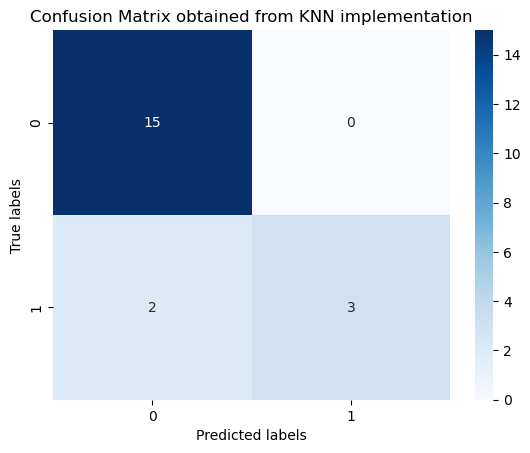

In [40]:
# confusion matrix
cm = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix obtained from KNN implementation')
plt.show()

In [41]:
# create DataFrame to store y_test and predictions
results = pd.DataFrame({'Actual Labels': y_test, 'KNN_Predictions': y_predict})

# **Using Decision Tree**

In [42]:
#using cross validation score to calculateoptimal value of leaf nodes

DTlist = []
DT_scores = []
for d in range(5,40):
   DTlist.append(d)
   DT = DecisionTreeClassifier(max_leaf_nodes=d)
   scores = cross_val_score(DT,x_train,y_train,cv=10, scoring = 'accuracy')
   DT_scores.append(scores.mean())

In [43]:
print(DT_scores)

[0.7818443051201671, 0.8002220480668756, 0.819762277951933, 0.8128657262277951, 0.8185736677115987, 0.8208725182863115, 0.8185736677115989, 0.8162878787878789, 0.8197361546499478, 0.8220219435736678, 0.820885579937304, 0.8208594566353188, 0.8243077324973876, 0.8277560083594565, 0.8243207941483803, 0.8151253918495298, 0.8151253918495298, 0.8174242424242424, 0.8185736677115987, 0.8208725182863115, 0.8174242424242424, 0.8208725182863115, 0.8185736677115989, 0.8197230929989552, 0.8174242424242424, 0.8185736677115987, 0.8162748171368861, 0.8162748171368861, 0.8162748171368861, 0.8185606060606061, 0.8208725182863115, 0.8162878787878787, 0.8162878787878787, 0.8220350052246603, 0.8139890282131661]


Text(0, 0.5, 'Mean Error')

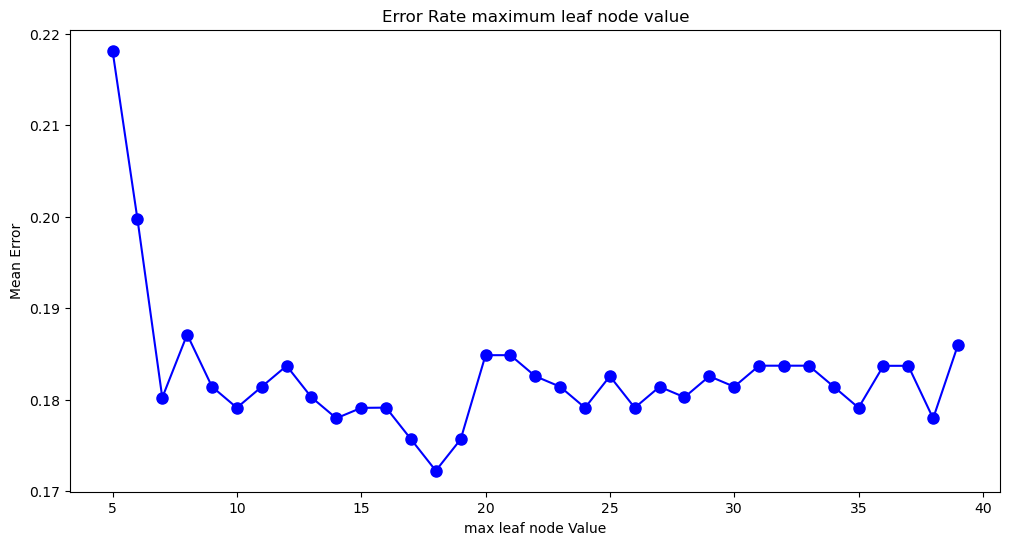

In [44]:
# calculating MSE
MSE=[1-x for x in DT_scores]

#plotting graph to visualize error rate and k values
plt.figure(figsize=(12, 6))
plt.plot(range(5,40), MSE, color='blue', linestyle="solid", marker='o',markersize=8)
plt.title('Error Rate maximum leaf node value')
plt.xlabel('max leaf node Value')
plt.ylabel('Mean Error')

In [45]:
#value of k for which mse is minimum is optimal
Optimal_ln = DTlist[MSE.index(min(MSE))]

print("The optimal value of max leaf nodes is ",Optimal_ln)

The optimal value of max leaf nodes is  18


In [46]:
#Create a decision tree with a maximum of 18 leaf nodes
DT = DecisionTreeClassifier(max_leaf_nodes=18)
DT = DT.fit(x_train, y_train)

In [47]:
DT.predict(x_test)
predictions = DT.predict(x_test)
print('Accuracy Score for Decision Tree:',accuracy_score(y_test, predictions))

Accuracy Score for Decision Tree: 0.9


In [48]:
predictions = DT.predict(x_test)
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [49]:
print("\nClassification Report of Decision Tre:\n\n" ,classification_report(y_test,predictions))


Classification Report of Decision Tre:

               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.87      0.87      0.87        20
weighted avg       0.90      0.90      0.90        20



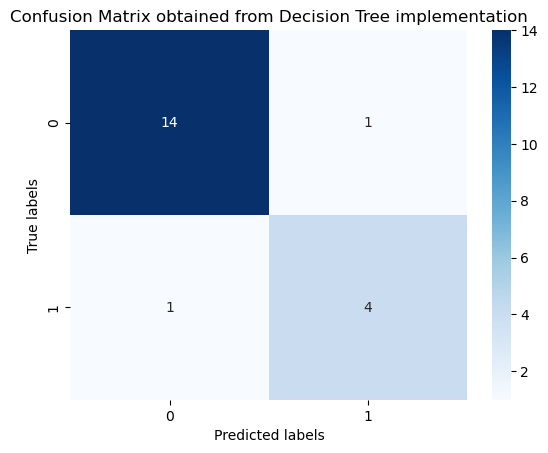

In [50]:
# confusion matrix
cm = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix obtained from Decision Tree implementation')
plt.show()

In [51]:
# create DataFrame to store y_test and predictions
results['Decision_Tree_Predictions']= predictions

In [52]:
results

,Actual Labels,KNN_Predictions,Decision_Tree_Predictions
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1
5,0,0,0
6,0,0,0
7,0,0,0
8,1,0,0
9,0,0,0


In [53]:
results.to_excel('Results.xlsx')

In [54]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=104cc96b43e20a3dd7cb7e33dcfb0a8a3bf0b0584e61d7b8a29b2f4df7b049c3
  Stored in directory: /root/.cache/pip/wheels/fa/2a/3c/e479c08ec101d2ae98ed32b6ecfa71d6256b02aa5791298873
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


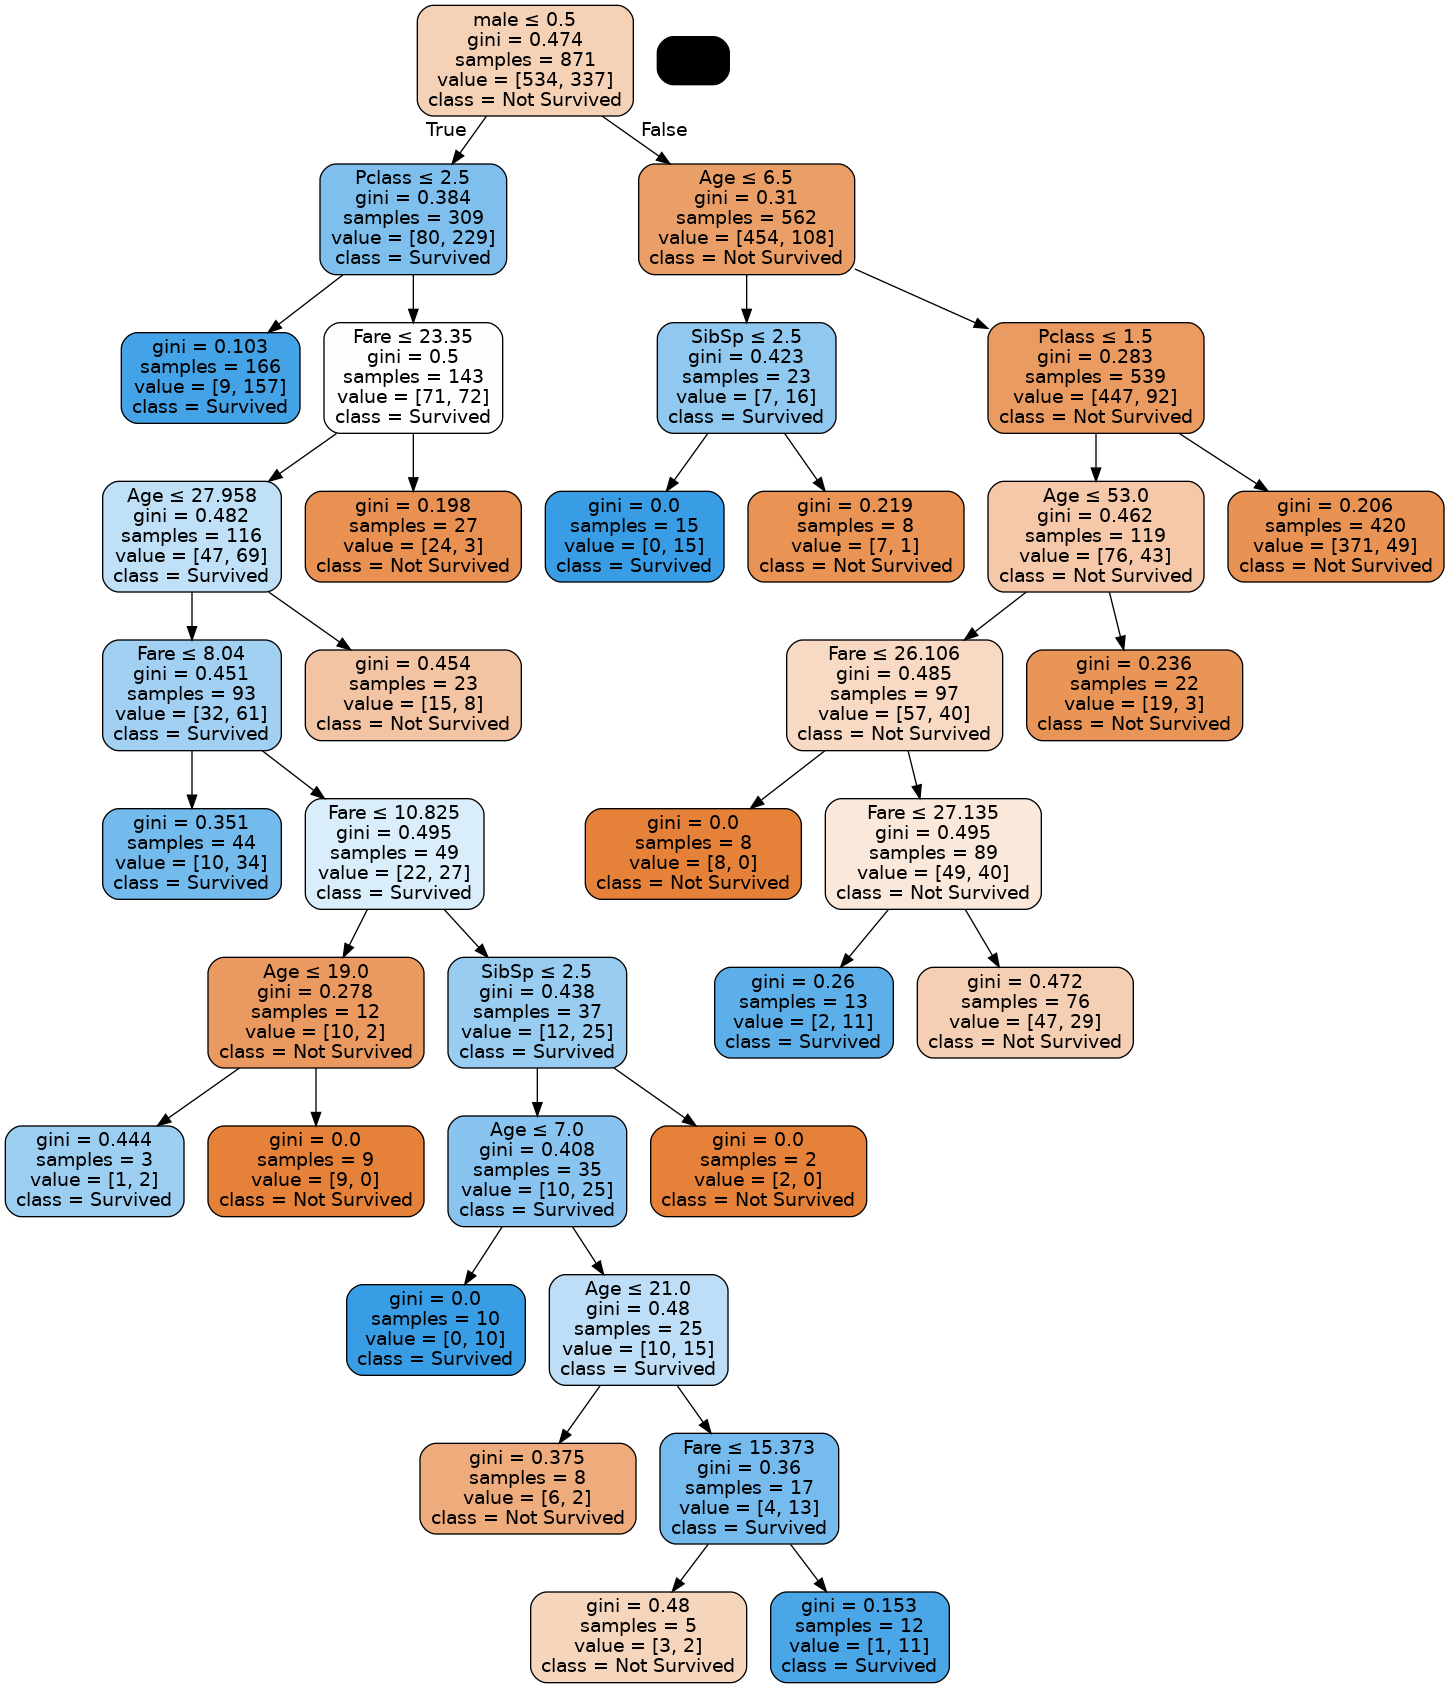

In [55]:
# Import necessary libraries for graph viz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=["Pclass", "Age", "SibSp", "Parch", "Fare", "female", "male", "C", "Q", "S"],
                class_names=["Not Survived", "Survived"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("decision_tree.png")  # Save the image to file
Image(graph.create_png())